

  We will perform image compression using single value decomposition on raw image data.


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.linalg import svd

Read the given image file into an variable.

Then we convert it into grayscale by averaging the R,G,B values for each pixel.

(288, 288, 3)


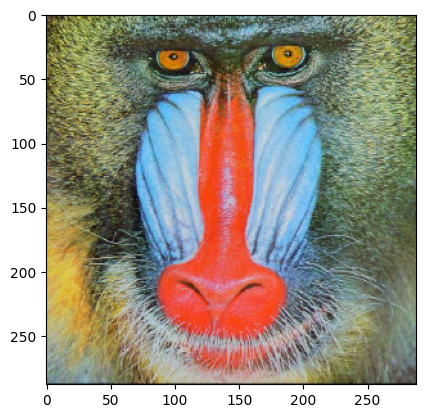

In [39]:
img_path = "mandrill_color.png"
img = cv2.imread(img_path)
print(img.shape)
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)

[[132.66666667  39.33333333 107.66666667 ...  59.33333333 117.
  151.33333333]
 [ 80.          67.          65.66666667 ... 103.         103.33333333
  102.        ]
 [ 70.66666667 107.          57.66666667 ...  88.66666667  66.33333333
   64.        ]
 ...
 [ 98.66666667 128.         145.33333333 ...  96.33333333  90.33333333
   82.33333333]
 [127.33333333 139.66666667 135.33333333 ...  93.66666667  87.66666667
   82.66666667]
 [ 77.33333333  70.          62.33333333 ...  44.33333333  43.33333333
   38.33333333]]


(288, 288)

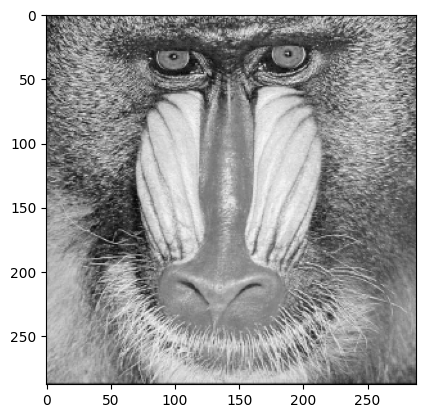

In [40]:
"""the code converts the original image to grayscale by taking the mean of the RGB channels,
displays the grayscale image, and provides information about the shape of the resulting array.
Finally, it prints the shape of the X array using X.shape.
This provides the dimensions of the 2D array, indicating the number of rows and columns in the image.
"""
X = np.mean(fix_img, axis=2)
print(X)
plt.imshow(X, cmap='gray')
X.shape

We perform singular value decomposition (SVD) on the matrix X and then plots the singular values.

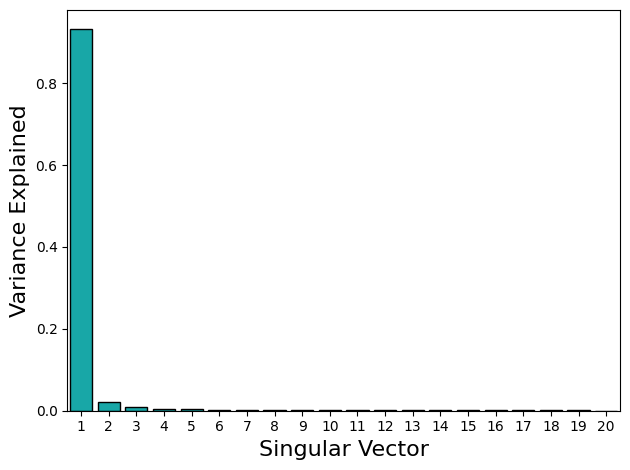

In [65]:
"""
"""

U,s,V = svd(X, full_matrices=False)
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained[0:20]

sns.barplot(x=list(range(1,21)),
            y=var_explained[0:20], color="c",edgecolor="black")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()

In [62]:
def reconstruct_image(k):
    x_rebuilt = np.dot(np.dot(U[:, :k], np.diag(s[:k])),V[:k])
    plt.imshow(x_rebuilt, cmap="gray")
    plt.title(f'Rank = {k}')
    plt.show()

def compression_Ratio(k):
    rows,cols = np.shape(X)
    compression_ratio = 100*k*(rows + cols+1)/(rows * cols)
    return compression_ratio

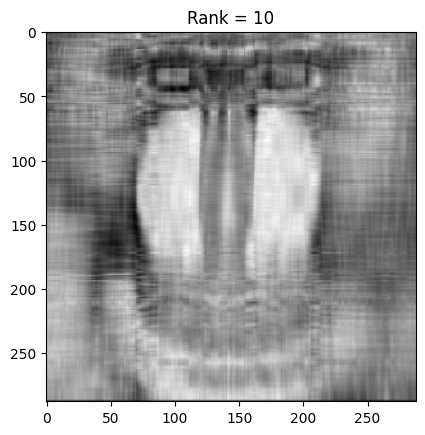

For Rank = 10, Compression ratio = 6.956500771604938


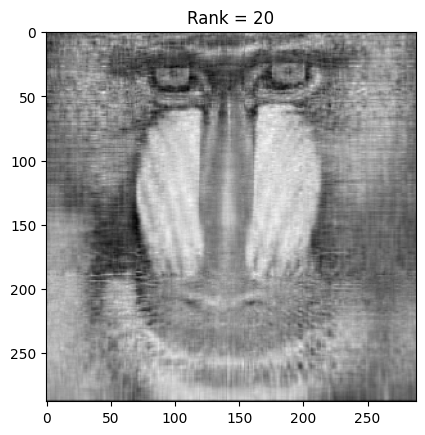

For Rank = 20, Compression ratio = 13.913001543209877


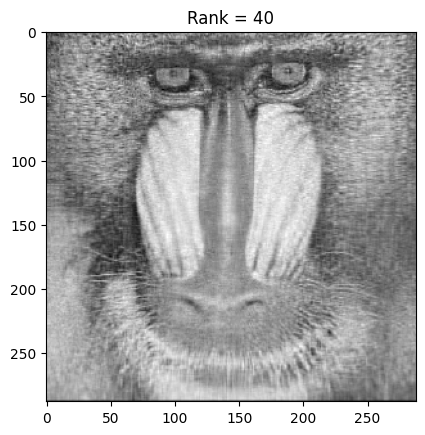

For Rank = 40, Compression ratio = 27.826003086419753


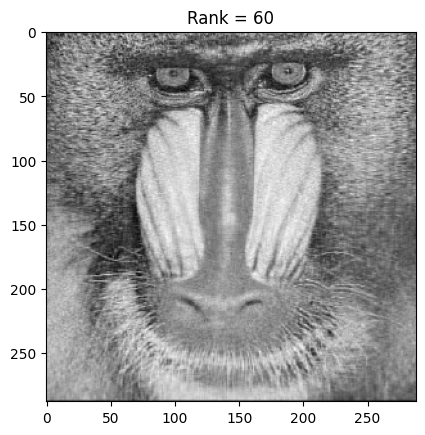

For Rank = 60, Compression ratio = 41.739004629629626


In [63]:
k = [10,20,40,60]

for i in range(len(k)):
  reconstruct_image(k[i])
  print(f"For Rank = {k[i]}, Compression ratio = {compression_Ratio(k[i])}")
